In [1]:
# 1. Importación de librerías

# Importamos las librerías necesarias para el análisis y visualización de datos
import pandas as pd        # Para manipulación y análisis de datos
import numpy as np         # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para crear gráficos
import seaborn as sns      # Para gráficos estadísticos más atractivos

# Configuramos seaborn para que los gráficos tengan un estilo agradable whitegrid = fondo blanco
sns.set(style="whitegrid")


In [2]:
# 2. Carga de los datos

# Leemos los archivos CSV que se nos proporcionaron.
# Me aseguro de que estos archivos estén en la misma carpeta que este script o indica la ruta correcta.
# Pongo un prefijo a la cadena r para indicarle a Python que no procese las barras invertidas como caracteres de escape.
loyalty_df = pd.read_csv(r"C:\Users\Carlos\OneDrive\Documents\Apuntes Data A\MODULO 3\EJERCICIO TECNICO\Customer Loyalty History.csv")

flight_df = pd.read_csv(r"C:\Users\Carlos\OneDrive\Documents\Apuntes Data A\MODULO 3\EJERCICIO TECNICO\Customer Flight Activity.csv")

In [3]:
# Mostramos las primeras filas de cada DataFrame para tener una vista rápida de los datos
print("Primeras filas de Customer Loyalty History:")
print(loyalty_df.head(), "\n")

print("Información de Customer Loyalty History:")
print(loyalty_df.info(), "\n")

Primeras filas de Customer Loyalty History:
   Loyalty Number Country          Province       City Postal Code  Gender  \
0          480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   
3          608370  Canada           Ontario    Toronto     P1W 1K4    Male   
4          530508  Canada            Quebec       Hull     J8Y 3Z5    Male   

  Education    Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  Bachelor   83236.0        Married         Star  3839.14        Standard   
1   College       NaN       Divorced         Star  3839.61        Standard   
2   College       NaN         Single         Star  3839.75        Standard   
3   College       NaN         Single         Star  3839.75        Standard   
4  Bachelor  103495.0        Married         Star  3842.79        Standard   

   Enrollment Year

In [4]:
print("Primeras filas de Customer Flight Activity:")
print(flight_df.head(), "\n")

print("Información de Customer Flight Activity:")
print(flight_df.info(), "\n")

Primeras filas de Customer Flight Activity:
   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                            0  
2  

In [5]:
# 3. Exploración inicial y unión de los datos

# Realizamos un merge (unión) de ambos DataFrames utilizando "Loyalty Number"
# que es el identificador único para cada cliente.
merged_df = pd.merge(flight_df, loyalty_df, on="Loyalty Number", how="inner")

In [6]:
# Mostramos las primeras filas del DataFrame resultante
print("Primeras filas del DataFrame unido:")
print(merged_df.head(), "\n")

Primeras filas del DataFrame unido:
   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  ... Education   Salary Marital Status  \
0                            0  ...  

In [7]:
# Comprobamos la existencia de valores nulos en el DataFrame unido
print("Cantidad de valores nulos por columna:")
print(merged_df.isnull().sum(), "\n")

Cantidad de valores nulos por columna:
Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int6

In [8]:
# 4. Limpieza de los datos

# Para asegurarnos de que los análisis sean correctos, se eliminan los valores nulos en las columnas clave.
columnas_clave = ["Flights Booked", "Distance", "Points Accumulated", "Education", "Salary", "Province"]
merged_df.dropna(subset=columnas_clave, inplace=True)

# Convertir tipos de datos de fecha que estaban en float a int.
merged_df["Cancellation Year"] = merged_df["Cancellation Year"].astype("Int64")
merged_df["Cancellation Month"] = merged_df["Cancellation Month"].astype("Int64")

In [9]:
print("Después de la limpieza, cantidad de valores nulos por columna:")
print(merged_df.isnull().sum(), "\n")

Después de la limpieza, cantidad de valores nulos por columna:
Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                              0
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              265560
Cancellation Month       

In [ ]:
# Elimino las columnas nulas y modifico el DataFrame original
merged_df.drop(['Cancellation Year', 'Cancellation Month'], axis=1, inplace=True)

# Verificamos que las columnas han sido eliminadas
print(merged_df.head())

C:\Users\Carlos\AppData\Local\Temp\ipykernel_11540\193380797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month", y="Flights Booked", data=vuelos_por_mes, palette="viridis")


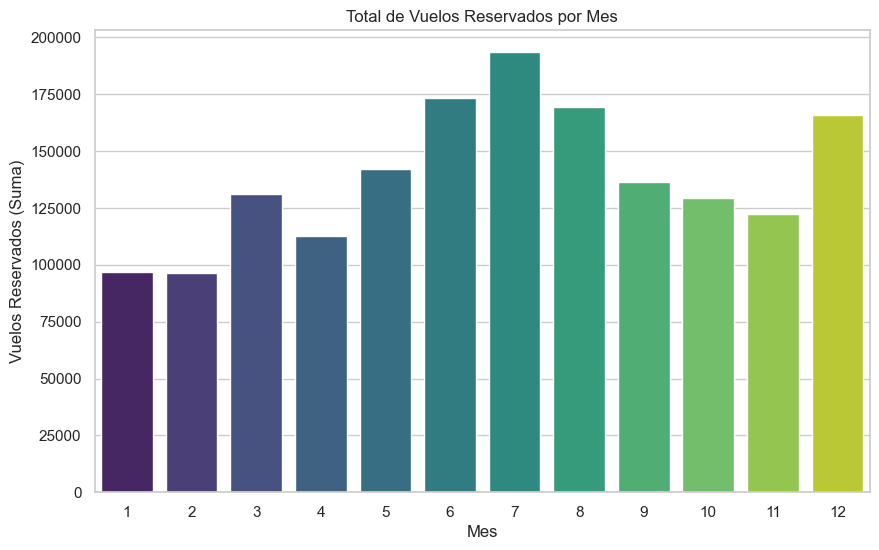

In [27]:
# 5. Visualización de los datos

# 5.a. Distribución de la cantidad de vuelos reservados por mes durante el año

  # Se agrupa la suma total de "Flights Booked" por mes para ver cómo varían las reservas.
vuelos_por_mes = merged_df.groupby("Month")["Flights Booked"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Month", y="Flights Booked", data=vuelos_por_mes, palette="viridis")
plt.title("Total de Vuelos Reservados por Mes")
plt.xlabel("Mes")
plt.ylabel("Vuelos Reservados (Suma)")
plt.show()

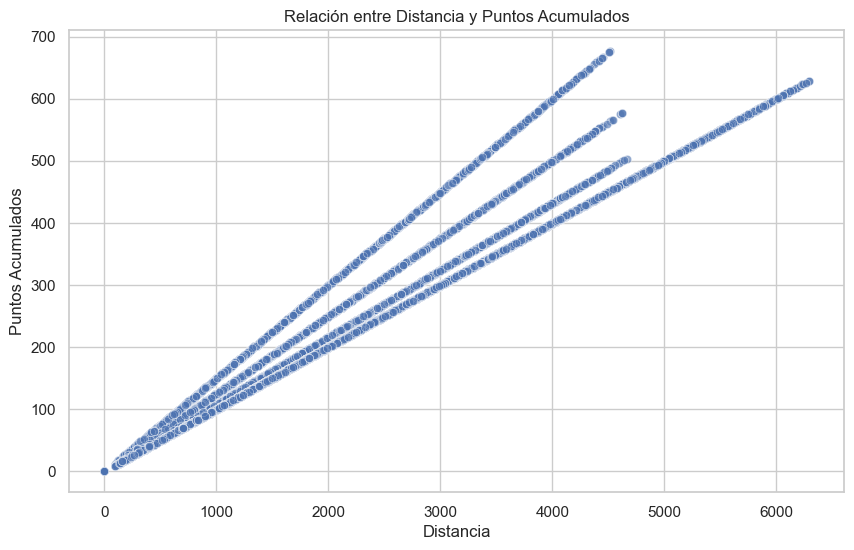

In [28]:
# 5.b. Relación entre la distancia de los vuelos y los puntos acumulados por los clientes
plt.figure(figsize=(10,6))
sns.scatterplot(x="Distance", y="Points Accumulated", data=merged_df, alpha=0.6)
plt.title("Relación entre Distancia y Puntos Acumulados")
plt.xlabel("Distancia")
plt.ylabel("Puntos Acumulados")
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_11540\2824569446.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Province", data=merged_df, order=merged_df['Province'].value_counts().index, palette="coolwarm")


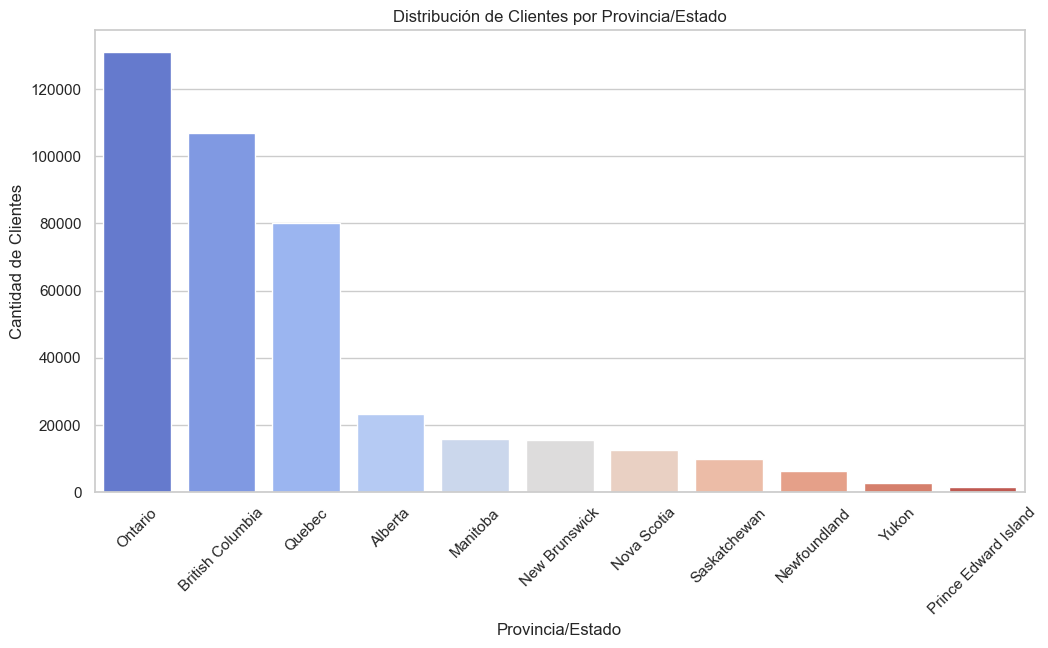

In [29]:
# 5.c. Distribución de los clientes por provincia o estado
plt.figure(figsize=(12,6))
# Se usa countplot y se ordena por la frecuencia de cada provincia
sns.countplot(x="Province", data=merged_df, order=merged_df['Province'].value_counts().index, palette="coolwarm")
plt.title("Distribución de Clientes por Provincia/Estado")
plt.xlabel("Provincia/Estado")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45)
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_11540\2961605980.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education", y="Salary", data=salario_por_educacion, palette="magma")


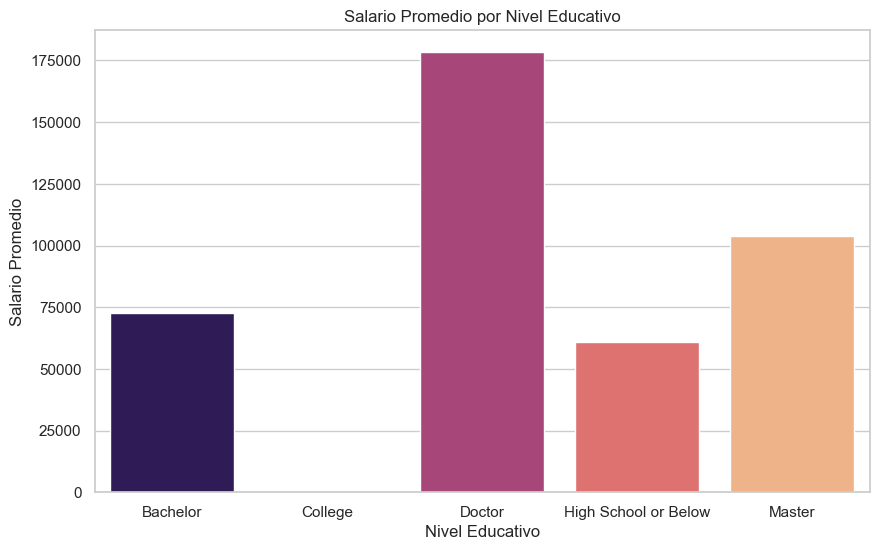

In [30]:
# 5.d. Comparación del salario promedio entre los diferentes niveles educativos
salario_por_educacion = merged_df.groupby("Education")["Salary"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Education", y="Salary", data=salario_por_educacion, palette="magma")
plt.title("Salario Promedio por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario Promedio")
plt.show()

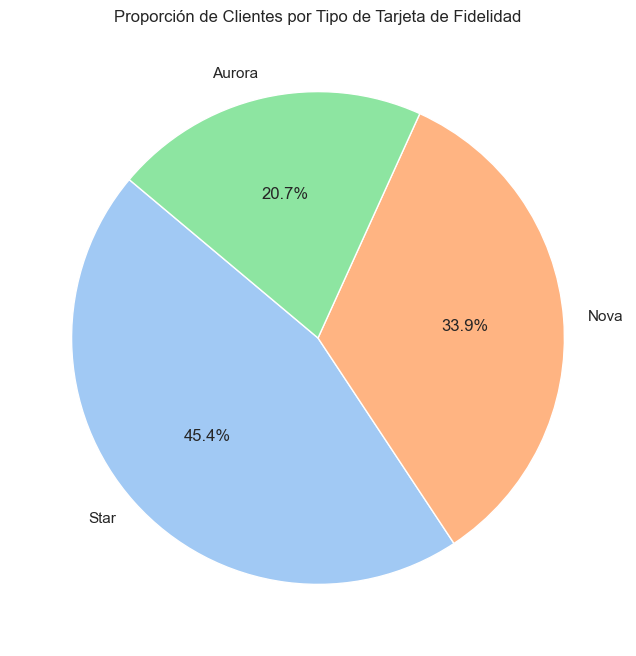

In [31]:
# 5.e. Proporción de clientes con diferentes tipos de tarjetas de fidelidad
tarjeta_counts = merged_df['Loyalty Card'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(tarjeta_counts, labels=tarjeta_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proporción de Clientes por Tipo de Tarjeta de Fidelidad")
plt.show()

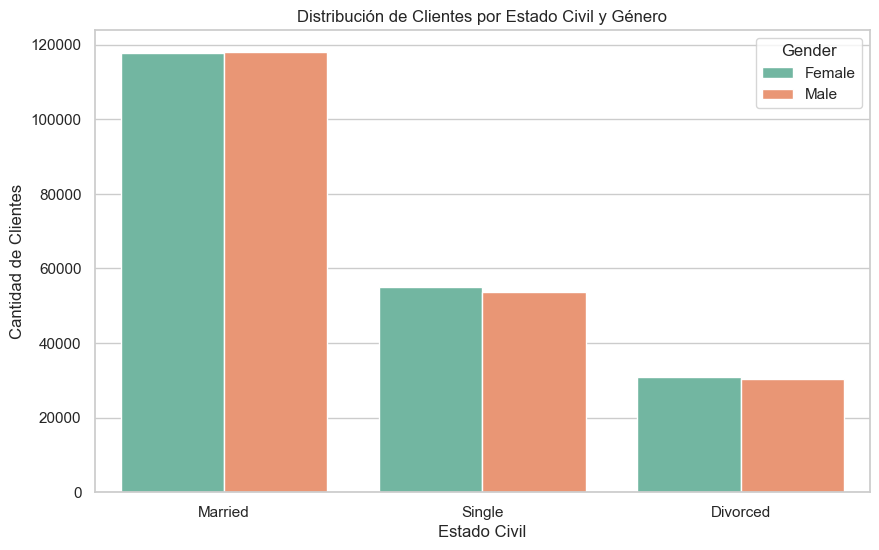

In [32]:
# 5.f. Distribución de clientes según su estado civil y género
plt.figure(figsize=(10,6))
sns.countplot(x="Marital Status", hue="Gender", data=merged_df, palette="Set2")
plt.title("Distribución de Clientes por Estado Civil y Género")
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad de Clientes")
plt.show()